
# Laboratorio de Operaciones Fundamentales en Señales Discretas

Este cuaderno muestra y explica operaciones fundamentales sobre **señales discretas**:
- Desplazamiento temporal (shift)
- Reflexión temporal
- Submuestreo (downsampling)

Cada operación se analiza en el **dominio del tiempo** y en el **dominio de la frecuencia** (usando DTFT).  
Se utiliza Python con librerías estándar como NumPy y Matplotlib.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def plot_signal(n, x, title="Señal en el tiempo"):
    """Gráfica una señal discreta en el tiempo"""
    plt.figure(figsize=(6,3))
    plt.stem(n, x, basefmt="k")
    plt.xlabel("n (índice discreto)")
    plt.ylabel("x[n]")
    plt.title(title)
    plt.grid(True)
    plt.show()

def compute_dtft(x, n, Nfreq=512):
    w = np.linspace(-np.pi, np.pi, Nfreq)
    X = np.array([np.sum(x * np.exp(-1j * w0 * n)) for w0 in w])
    return w, X

def plot_spectrum(w, X, title="DTFT"):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(w, np.abs(X))
    plt.title(f"|X(ω)| - {title}")
    plt.xlabel("ω (rad)")
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.plot(w, np.angle(X))
    plt.title(f"∠X(ω) - {title}")
    plt.xlabel("ω (rad)")
    plt.grid(True)

    plt.tight_layout()
    plt.show()


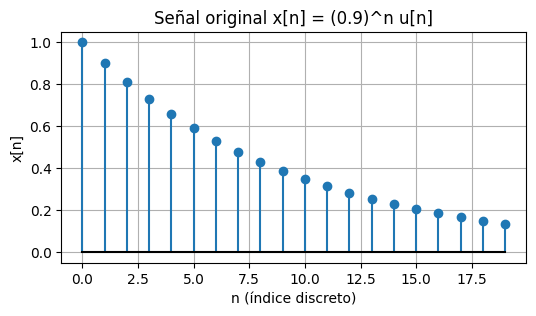

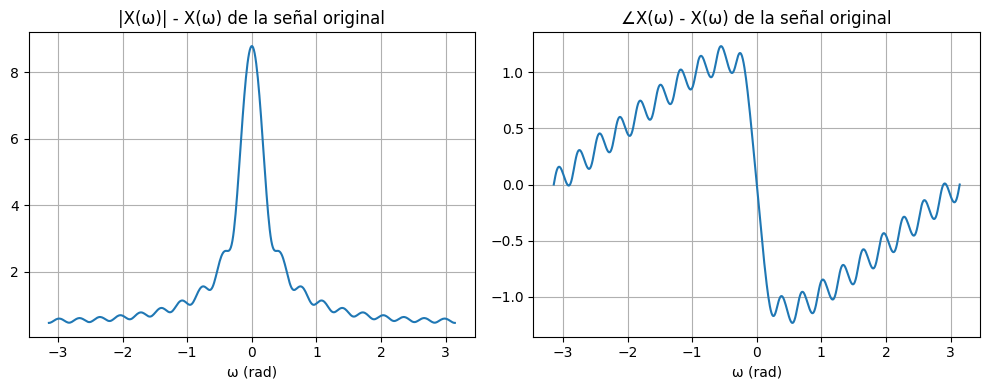

In [ ]:

n = np.arange(0, 20)
x = (0.9)**n

plot_signal(n, x, "Señal original x[n] = (0.9)^n u[n]")

w, X = compute_dtft(x, n)
plot_spectrum(w, X, "X(ω) de la señal original")


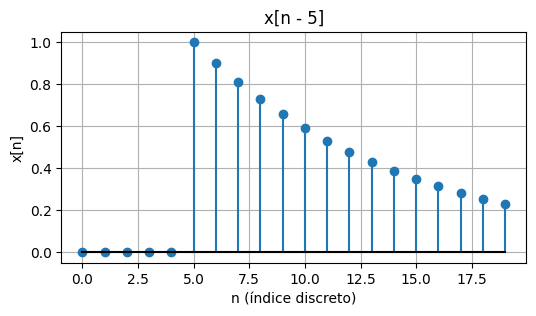

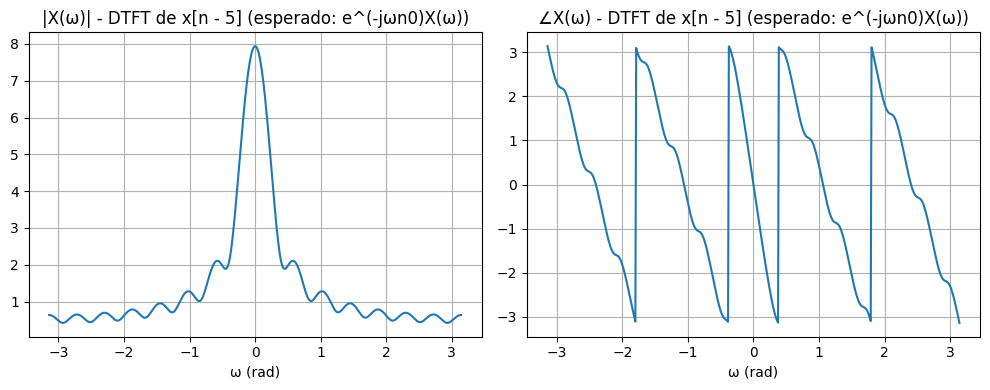

In [ ]:

n0 = 5
x_shift = (0.9)**(n - n0) * (n >= n0)

plot_signal(n, x_shift, f"x[n - {n0}]")

w, X_shift = compute_dtft(x_shift, n)
plot_spectrum(w, X_shift, f"DTFT de x[n - {n0}] (esperado: e^(-jωn0)X(ω))")

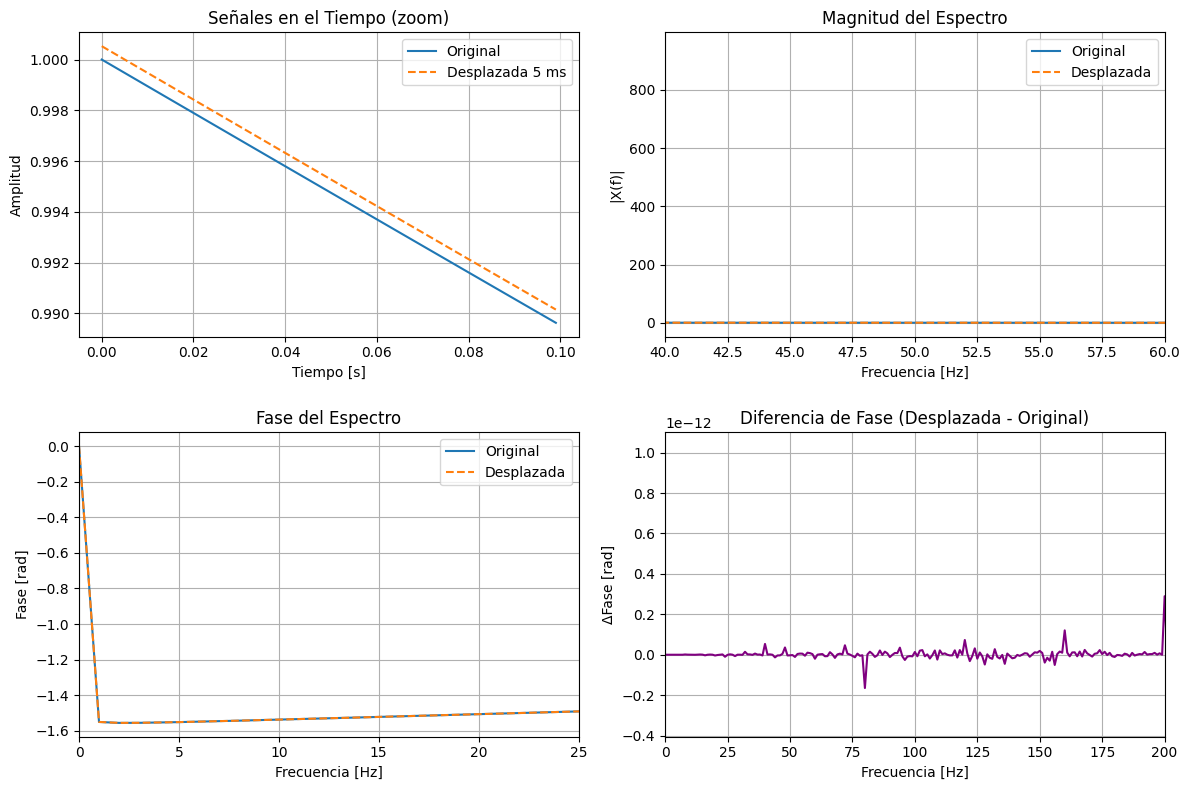

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 1000        # Frecuencia de muestreo (Hz)
T = 1.0          # Duración total (s)
f0 = 50          # Frecuencia de la señal (Hz)
t = np.arange(0, T, 1/fs)

# Señal original
x = np.sin(2*np.pi*f0*t)
# x = (0.9)**t

# Señal desplazada en el tiempo
delay = 0.005   # 10 ms
x_shifted = np.sin(2*np.pi*f0*(t - delay))
# x_shifted = (0.9)**(t - delay)

# FFT
N = len(t)
freqs = np.fft.fftfreq(N, 1/fs)
X = np.fft.fft(x)
X_shifted = np.fft.fft(x_shifted)

# Solo frecuencias positivas
mask = freqs >= 0
freqs_pos = freqs[mask]
X_pos = X[mask]
X_shifted_pos = X_shifted[mask]

# ----------------- Graficar -----------------
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(t[:100], x[:100], label="Original")
plt.plot(t[:100], x_shifted[:100], "--", label=f"Desplazada {delay*1000:.0f} ms")
plt.title("Señales en el Tiempo (zoom)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)

# Magnitud del espectro
plt.subplot(2, 2, 2)
plt.plot(freqs_pos, np.abs(X_pos), label="Original")
plt.plot(freqs_pos, np.abs(X_shifted_pos), "--", label="Desplazada")
plt.xlim(40, 60)
plt.title("Magnitud del Espectro")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("|X(f)|")
plt.legend()
plt.grid(True)

# Fase del espectro
plt.subplot(2, 2, 3)
plt.plot(freqs_pos, np.angle(X_pos), label="Original")
plt.plot(freqs_pos, np.angle(X_shifted_pos), "--", label="Desplazada")
plt.xlim(0, 25)
plt.title("Fase del Espectro")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Fase [rad]")
plt.legend()
plt.grid(True)

# Diferencia de fase
phase_diff = np.unwrap(np.angle(X_shifted_pos)) - np.unwrap(np.angle(X_pos))
plt.subplot(2, 2, 4)
plt.plot(freqs_pos, phase_diff, color="purple")
plt.xlim(0, 200)
plt.title("Diferencia de Fase (Desplazada - Original)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("ΔFase [rad]")
plt.grid(True)

plt.tight_layout()
plt.show()

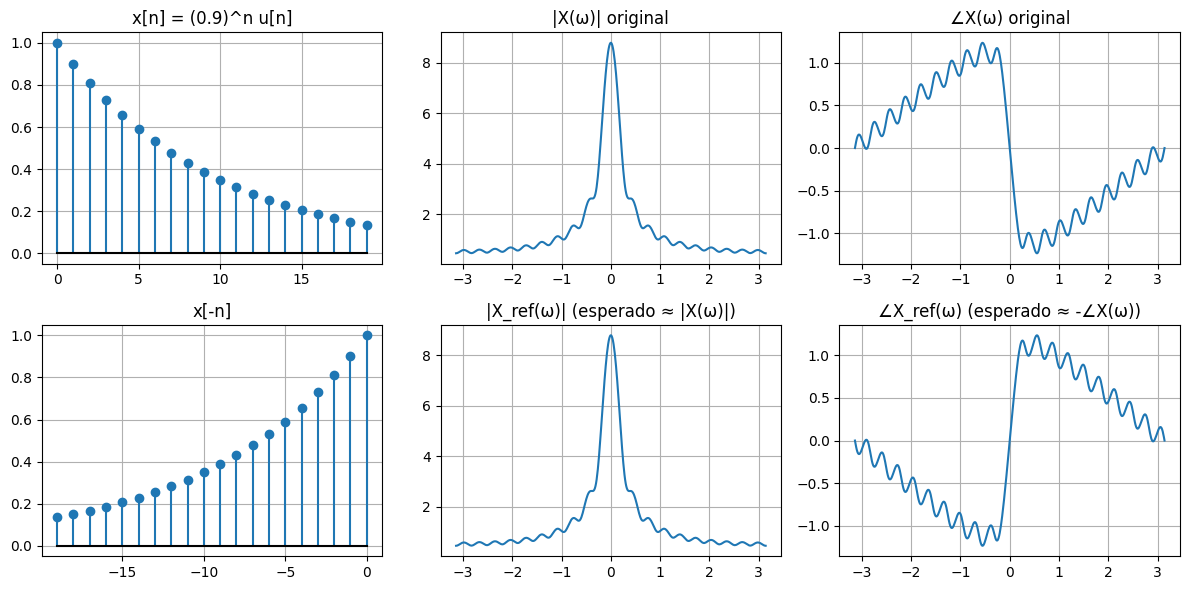

In [ ]:
# Señal original
n = np.arange(0, 20)
x = (0.9)**n
w, X = compute_dtft(x, n)

# Señal reflejada
n_ref = -n
x_ref = (0.9)**(-n_ref) * (n_ref <= 0)
w, X_ref = compute_dtft(x_ref, n_ref)

# Graficar en 2x3
fig, axes = plt.subplots(2, 3, figsize=(12,6))

# Señal original
axes[0,0].stem(n, x, basefmt="k")
axes[0,0].set_title("x[n] = (0.9)^n u[n]")
axes[0,0].grid(True)

axes[0,1].plot(w, np.abs(X))
axes[0,1].set_title("|X(ω)| original")
axes[0,1].grid(True)

axes[0,2].plot(w, np.angle(X))
axes[0,2].set_title("∠X(ω) original")
axes[0,2].grid(True)

# Señal reflejada
axes[1,0].stem(n_ref, x_ref, basefmt="k")
axes[1,0].set_title("x[-n]")
axes[1,0].grid(True)

axes[1,1].plot(w, np.abs(X_ref))
axes[1,1].set_title("|X_ref(ω)| (esperado ≈ |X(ω)|)")
axes[1,1].grid(True)

axes[1,2].plot(w, np.angle(X_ref))
axes[1,2].set_title("∠X_ref(ω) (esperado ≈ -∠X(ω))")
axes[1,2].grid(True)

plt.tight_layout()
plt.show()


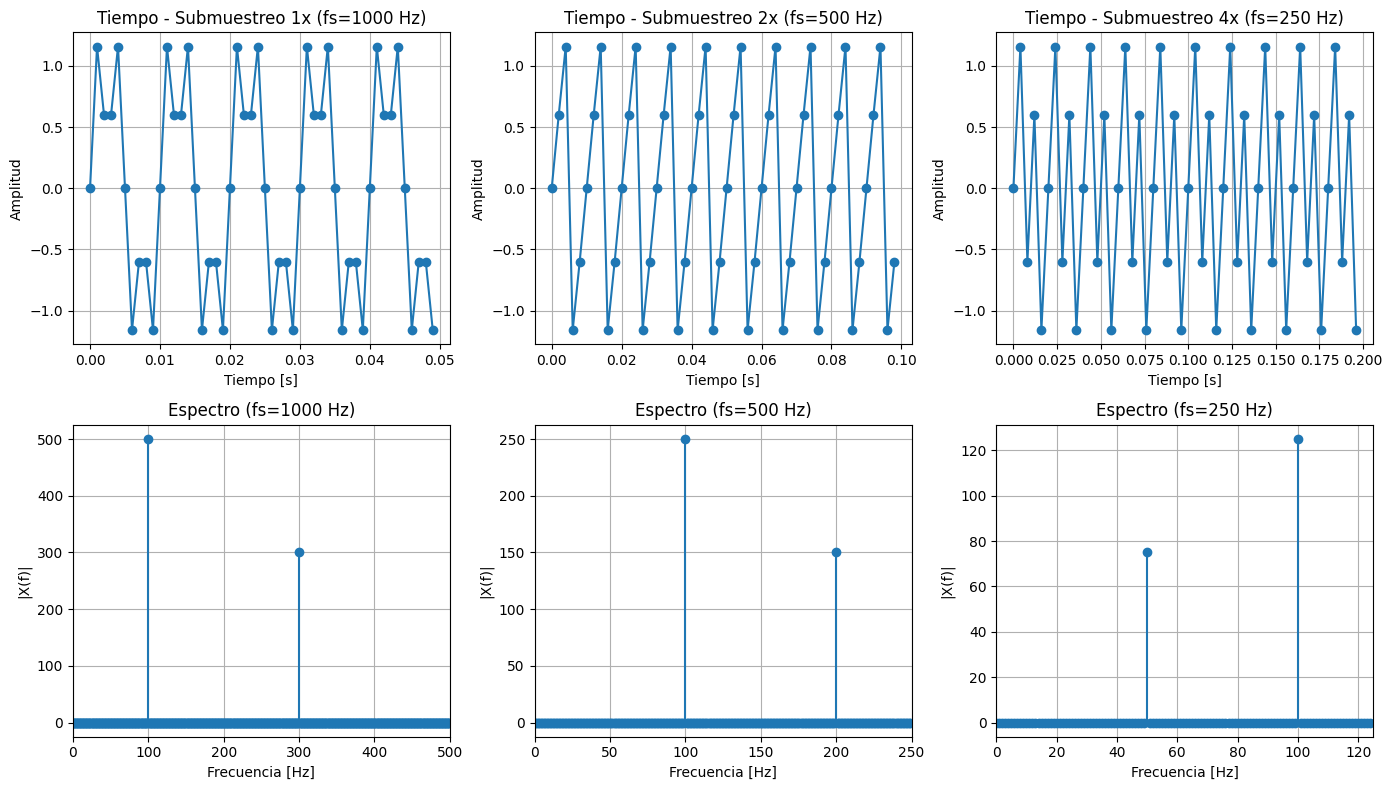

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 1000       # Frecuencia de muestreo original
T = 1.0         # Duración
f1, f2 = 100, 300   # Señales seno (para ver aliasing claro)
t = np.arange(0, T, 1/fs)

# Señal original
x = np.sin(2*np.pi*f1*t) + 0.6*np.sin(2*np.pi*f2*t)

# Función para submuestrear y obtener espectro
def submuestrear(x, factor, fs):
    x_sub = x[::factor]
    fs_sub = fs // factor
    N = len(x_sub)
    freqs = np.fft.fftfreq(N, 1/fs_sub)
    X = np.fft.fft(x_sub)
    mask = freqs >= 0
    return x_sub, fs_sub, freqs[mask], np.abs(X[mask])

# Diferentes submuestreos
factores = [1, 2, 4]  # original, fs/2, fs/4
resultados = [submuestrear(x, f, fs) for f in factores]

# ---------------- Graficar ----------------
plt.figure(figsize=(14, 8))

for i, (x_sub, fs_sub, freqs, Xmag) in enumerate(resultados):
    # Tiempo de la señal submuestreada
    t_sub = np.arange(len(x_sub)) / fs_sub

    # Señal en el tiempo
    plt.subplot(2, 3, i+1)
    plt.plot(t_sub[:50], x_sub[:50], marker="o")
    plt.title(f"Tiempo - Submuestreo {factores[i]}x (fs={fs_sub} Hz)")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.grid(True)

    # Espectro
    plt.subplot(2, 3, i+4)
    plt.stem(freqs, Xmag, basefmt=" ")
    plt.xlim(0, fs_sub/2)
    plt.title(f"Espectro (fs={fs_sub} Hz)")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|X(f)|")
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import sounddevice as sd

# Parámetros
fs = 44100        # Frecuencia de muestreo original (Hz)
dur = 2.0         # Duración (s)
f1, f2 = 1000, 12000   # Dos tonos (uno por debajo y otro por encima de Nyquist si reducimos)

# Tiempo y señal original
t = np.arange(0, int(fs*dur)) / fs
x = 0.5*np.sin(2*np.pi*f1*t) + 0.5*np.sin(2*np.pi*f2*t)

# Función para submuestrear
def submuestrear_audio(x, factor, fs):
    x_sub = x[::factor]
    fs_sub = fs // factor
    return x_sub, fs_sub

# Submuestreos
x1, fs1 = x, fs               # Original
x2, fs2 = submuestrear_audio(x, 2, fs)  # fs/2
x3, fs3 = submuestrear_audio(x, 4, fs)  # fs/4

# ---------------- Reproducción ----------------
print("▶ Reproduciendo señal original (fs = 44100 Hz)...")
sd.play(x1, fs1)
sd.wait()

print("▶ Reproduciendo señal submuestreada (fs = 22050 Hz)...")
sd.play(x2, fs2)
sd.wait()

print("▶ Reproduciendo señal submuestreada (fs = 11025 Hz)...")
sd.play(x3, fs3)
sd.wait()

▶ Reproduciendo señal original (fs = 44100 Hz)...
▶ Reproduciendo señal submuestreada (fs = 22050 Hz)...
▶ Reproduciendo señal submuestreada (fs = 11025 Hz)...



## Conclusiones

- **Desplazamiento**: en tiempo corresponde a correr la señal, en frecuencia introduce un factor exponencial complejo \(e^{-j \omega n_0}\).  
- **Reflexión**: en tiempo invierte la señal, en frecuencia corresponde a la conjugación y cambio de signo en la variable de frecuencia.  
- **Submuestreo**: reduce el número de muestras, pero en frecuencia causa **aliasing** debido a la compresión y solapamiento del espectro.  

Este laboratorio permite experimentar con señales discretas y entender sus efectos en ambos dominios.


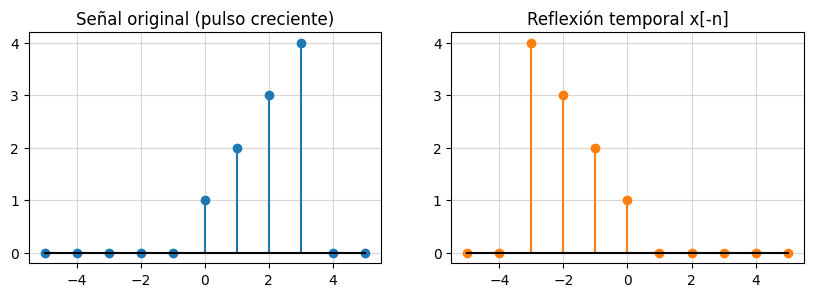

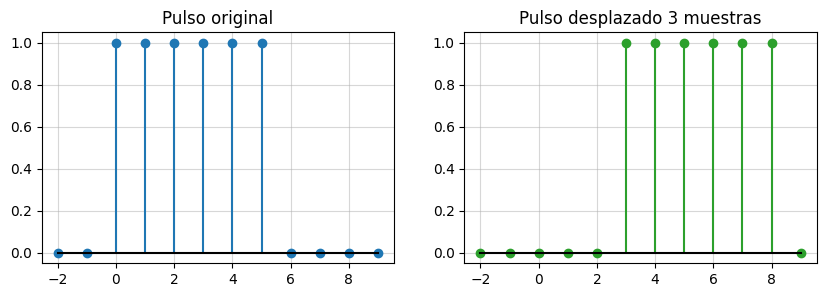

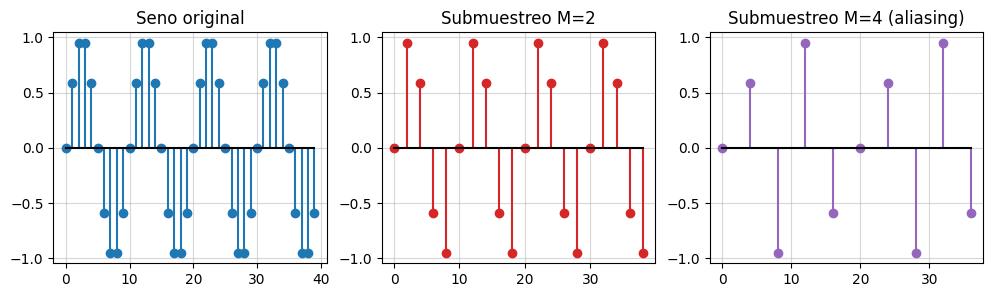

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Funciones auxiliares
# -----------------------------
def plot_stem(ax, n, x, title, color="C0"):
    markerline, stemlines, baseline = ax.stem(n, x, basefmt="k", linefmt=color+"-", markerfmt=color+"o")
    plt.setp(markerline, markersize=6)
    plt.setp(stemlines, linewidth=1.5)
    ax.set_title(title)
    ax.grid(True, alpha=0.5)


# -----------------------------
# 1. Reflexión temporal
# -----------------------------
n = np.arange(-5, 6)
x_ref = (n >= 0) * (n <= 3) * (n+1)   # pulso creciente: 1,2,3,4
x_reflected = ( (-n) >= 0 ) * ( (-n) <= 3 ) * ((-n)+1)

fig, axs = plt.subplots(1, 2, figsize=(10,3))
plot_stem(axs[0], n, x_ref, "Señal original (pulso creciente)")
plot_stem(axs[1], n, x_reflected, "Reflexión temporal x[-n]", "C1")
plt.show()

# -----------------------------
# 2. Desplazamiento temporal
# -----------------------------
n = np.arange(-2, 10)
x_shift = (n >= 0) * (n <= 5)   # pulso rectangular [0,5]
x_shifted = ((n-3) >= 0) * ((n-3) <= 5)   # desplazado 3 pasos

fig, axs = plt.subplots(1, 2, figsize=(10,3))
plot_stem(axs[0], n, x_shift, "Pulso original")
plot_stem(axs[1], n, x_shifted, "Pulso desplazado 3 muestras", "C2")
plt.show()

# -----------------------------
# 3. Submuestreo
# -----------------------------
n = np.arange(0, 40)
x = np.sin(0.2*np.pi*n)    # seno original

# Submuestreos
x_sub2 = x[::2]
n_sub2 = n[::2]
x_sub4 = x[::4]
n_sub4 = n[::4]

fig, axs = plt.subplots(1, 3, figsize=(12,3))
plot_stem(axs[0], n, x, "Seno original")
plot_stem(axs[1], n_sub2, x_sub2, "Submuestreo M=2", "C3")
plot_stem(axs[2], n_sub4, x_sub4, "Submuestreo M=4 (aliasing)", "C4")
plt.show()

🔊 Señal original (armónicos + ruido)


🔊 Reflexión temporal


🔊 Desplazamiento temporal (0.5s)


🔊 Submuestreo M=2 (aliasing)


🔊 Submuestreo M=4 (aliasing más fuerte)


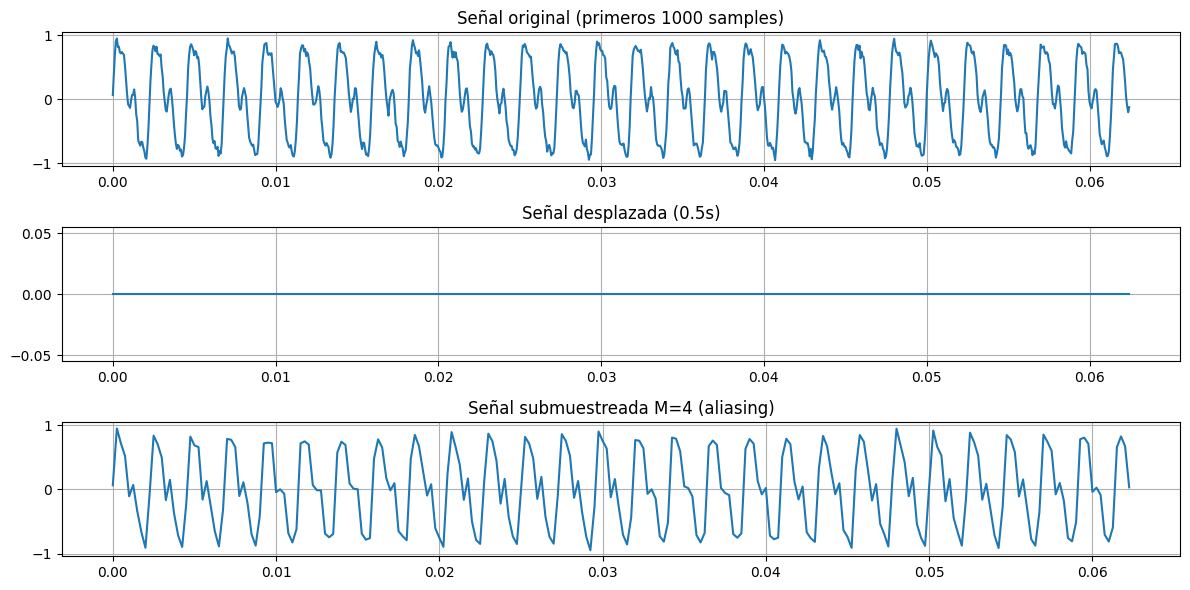

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

# Parámetros generales
fs = 16000        # frecuencia de muestreo (Hz)
dur = 3           # duración (segundos)
t = np.arange(0, dur, 1/fs)

# Señal original: suma de 3 senoidales + ruido
x = (np.sin(2*np.pi*440*t) +      # fundamental
     0.5*np.sin(2*np.pi*880*t) +  # 2ª armónica
     0.25*np.sin(2*np.pi*1760*t)) # 4ª armónica

# Ruido blanco agregado
np.random.seed(0)
x = x + 0.05*np.random.randn(len(t))

# Normalización para evitar saturación
x = x / np.max(np.abs(x))

# Reflexión temporal
x_ref = np.flip(x)

# Desplazamiento temporal (fase cambiada, 0.5 s de delay)
delay = int(0.5 * fs)
x_shift = np.concatenate((np.zeros(delay), x[:-delay]))

# Submuestreo
x_sub2 = x[::2]   # M=2
fs_sub2 = fs//2

x_sub4 = x[::4]   # M=4
fs_sub4 = fs//4

# -----------------------------
# Reproducir sonidos
# -----------------------------
print("🔊 Señal original (armónicos + ruido)")
display(Audio(x, rate=fs))

print("🔊 Reflexión temporal")
display(Audio(x_ref, rate=fs))

print("🔊 Desplazamiento temporal (0.5s)")
display(Audio(x_shift, rate=fs))

print("🔊 Submuestreo M=2 (aliasing)")
display(Audio(x_sub2, rate=fs_sub2))

print("🔊 Submuestreo M=4 (aliasing más fuerte)")
display(Audio(x_sub4, rate=fs_sub4))

# -----------------------------
# Gráficas comparativas
# -----------------------------
fig, axs = plt.subplots(3, 1, figsize=(12,6))

axs[0].plot(t[:1000], x[:1000])
axs[0].set_title("Señal original (primeros 1000 samples)")
axs[0].grid(True)

axs[1].plot(t[:1000], x_shift[:1000])
axs[1].set_title("Señal desplazada (0.5s)")
axs[1].grid(True)

axs[2].plot(t[:1000:4], x_sub4[:250])  # muestro 250 puntos submuestreados
axs[2].set_title("Señal submuestreada M=4 (aliasing)")
axs[2].grid(True)

plt.tight_layout()
plt.show()

🎤 Grabando tu voz...
✅ Grabación finalizada
🔊 Voz original


🔊 Reflexión temporal (voz al revés)


🔊 Desplazamiento temporal (entra después de 0.5s)


🔊 Submuestreo M=2 (aliasing moderado)


🔊 Submuestreo M=4 (aliasing fuerte)


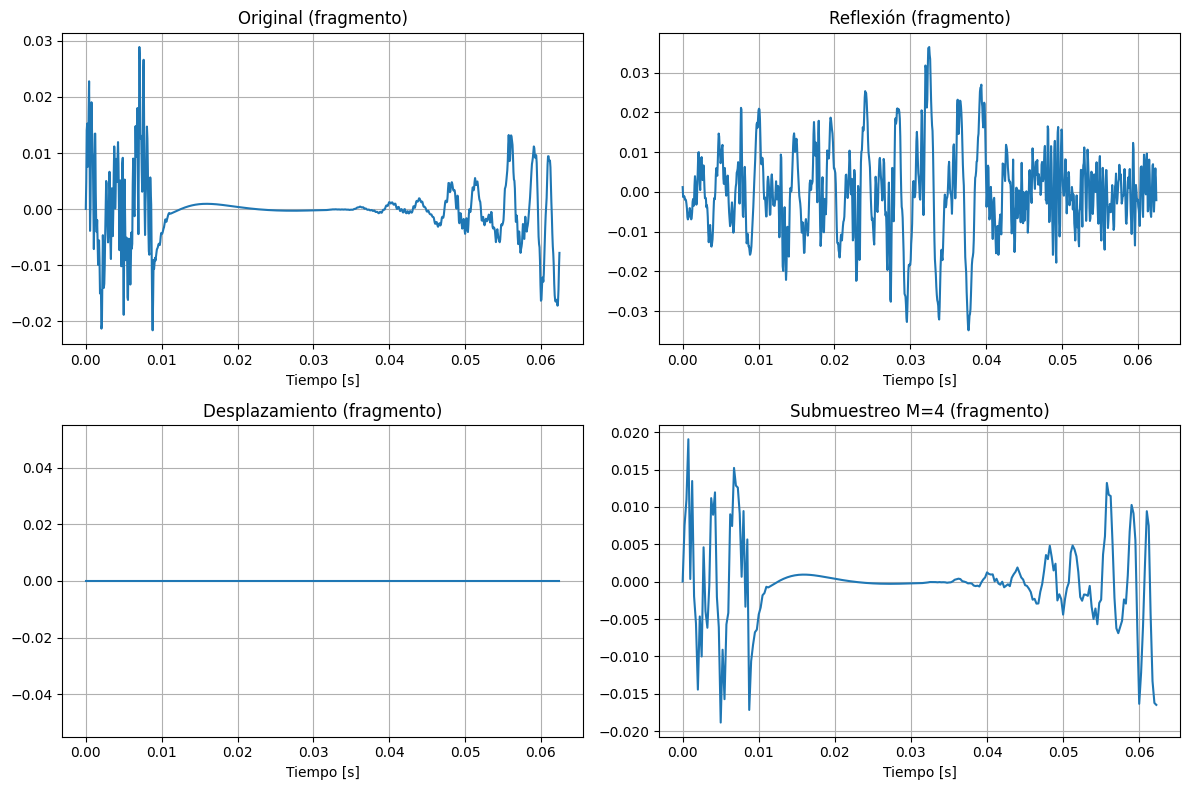

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import soundfile as sf
from IPython.display import Audio

# -----------------------------
# 1. Grabar voz y guardar
# -----------------------------
fs = 16000   # frecuencia de muestreo
seconds = 5  # duración de grabación

print("🎤 Grabando tu voz...")
voz = sd.rec(int(seconds * fs), samplerate=fs, channels=1, dtype='float32')
sd.wait()
print("✅ Grabación finalizada")

# Guardar
sf.write("voz.wav", voz, fs)

# Reproducir original
print("🔊 Voz original")
display(Audio("voz.wav"))

# Convertir a vector 1D
x = voz.flatten()
t = np.arange(len(x)) / fs

# -----------------------------
# 2. Operaciones básicas
# -----------------------------

# Reflexión temporal
x_ref = np.flip(x)

# Desplazamiento (0.5s de silencio al inicio)
delay = int(0.5 * fs)
x_shift = np.concatenate((np.zeros(delay), x[:-delay]))

# Submuestreo (con aliasing)
x_sub2 = x[::2]
fs_sub2 = fs // 2

x_sub4 = x[::4]
fs_sub4 = fs // 4

# -----------------------------
# 3. Reproducir resultados
# -----------------------------
print("🔊 Reflexión temporal (voz al revés)")
display(Audio(x_ref, rate=fs))

print("🔊 Desplazamiento temporal (entra después de 0.5s)")
display(Audio(x_shift, rate=fs))

print("🔊 Submuestreo M=2 (aliasing moderado)")
display(Audio(x_sub2, rate=fs_sub2))

print("🔊 Submuestreo M=4 (aliasing fuerte)")
display(Audio(x_sub4, rate=fs_sub4))

# -----------------------------
# 4. Visualizaciones (tiempo)
# -----------------------------
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(t[:1000], x[:1000])
plt.title("Original (fragmento)")
plt.xlabel("Tiempo [s]")
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(t[:1000], x_ref[:1000])
plt.title("Reflexión (fragmento)")
plt.xlabel("Tiempo [s]")
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(t[:1000], x_shift[:1000])
plt.title("Desplazamiento (fragmento)")
plt.xlabel("Tiempo [s]")
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(t[:1000:4], x_sub4[:250])
plt.title("Submuestreo M=4 (fragmento)")
plt.xlabel("Tiempo [s]")
plt.grid(True)

plt.tight_layout()
plt.show()

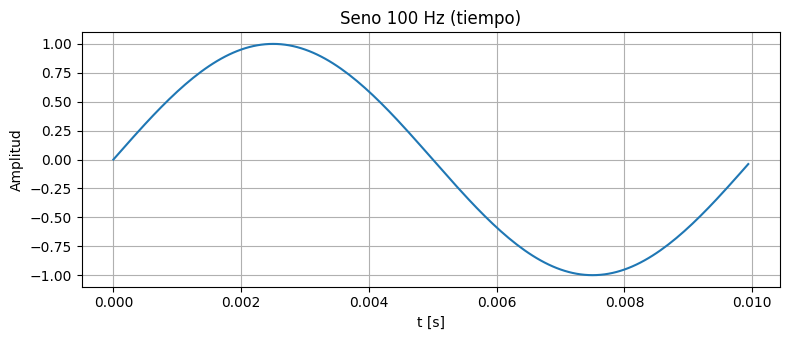

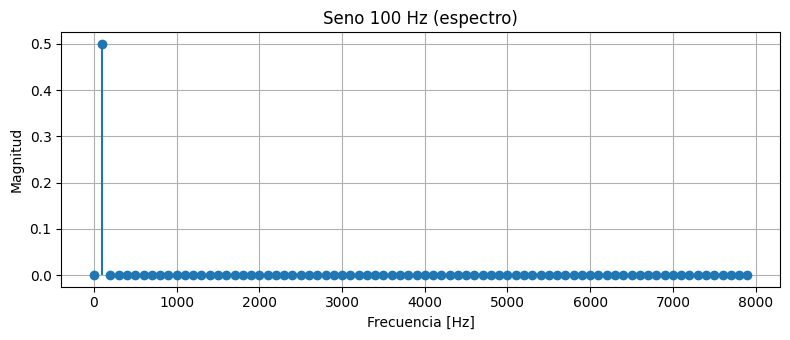

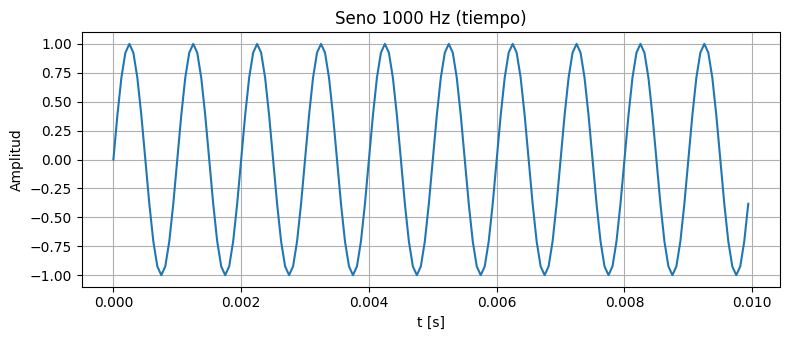

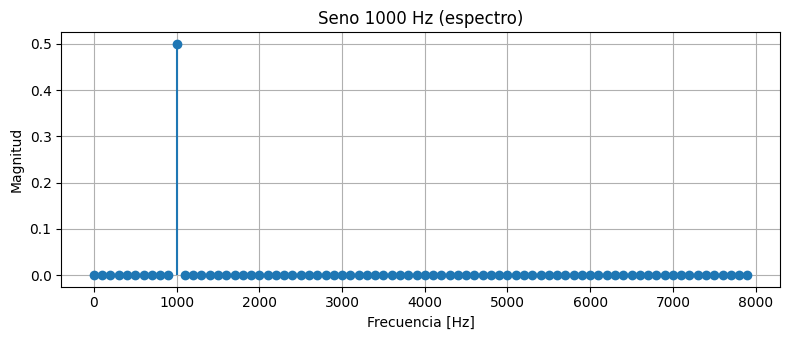

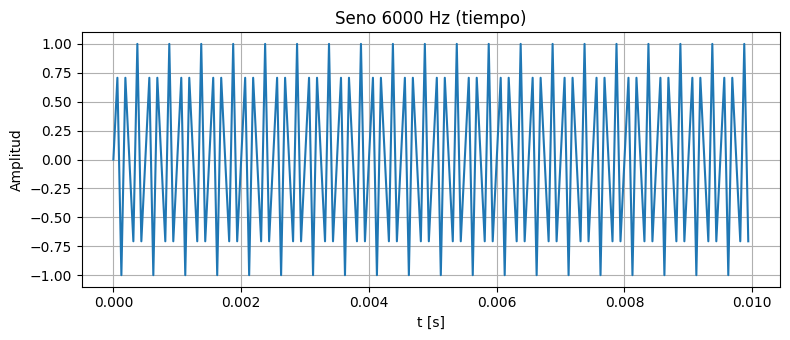

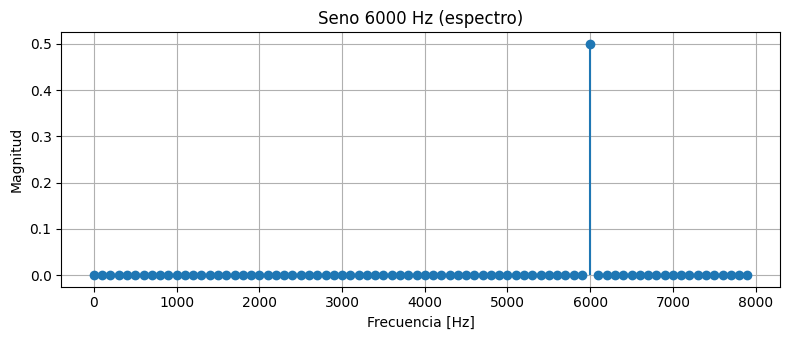

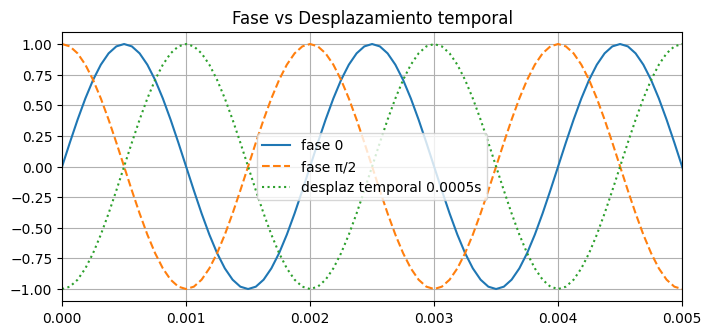

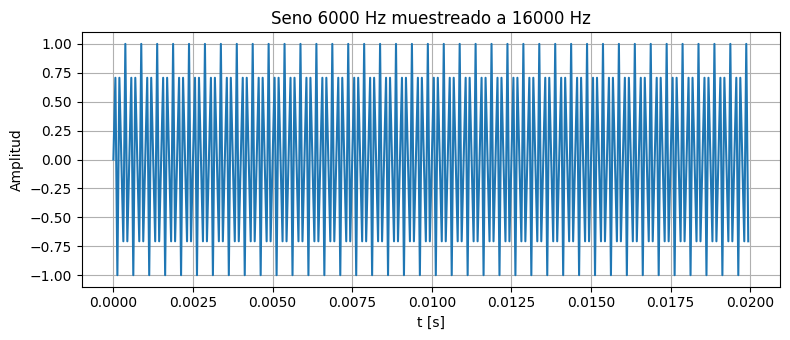

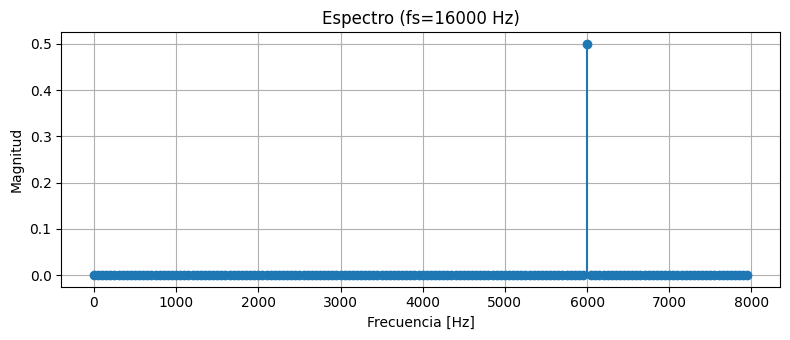

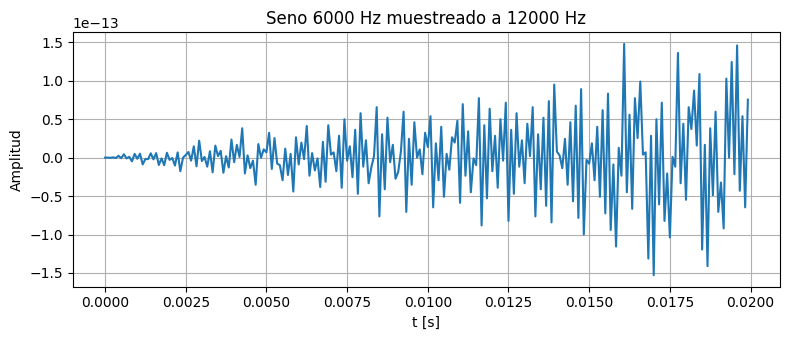

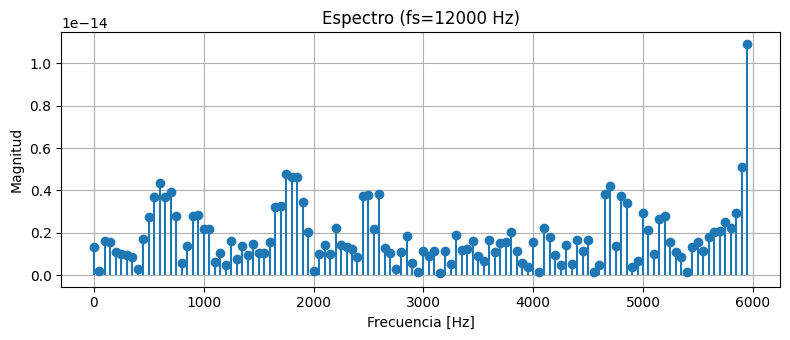

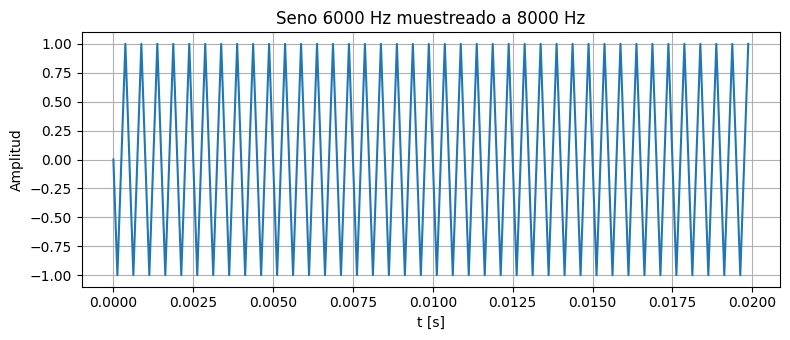

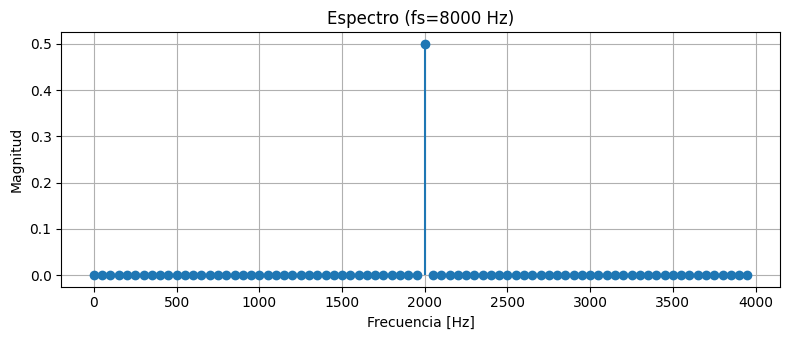

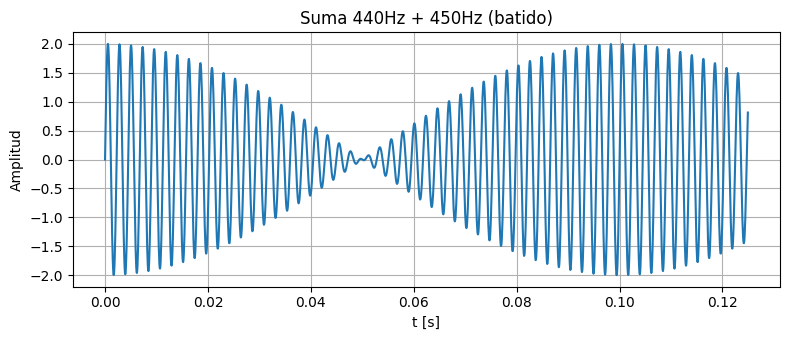

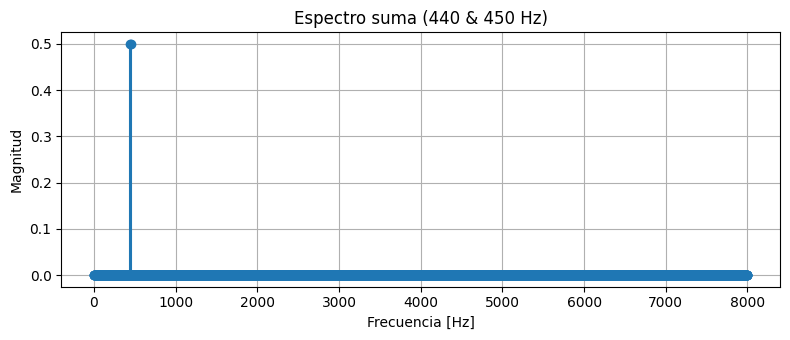

Fase real: 0.7853981633974483 rad
Fase estimada (rad): -0.7853981633974703
Archivo 'combined.wav' guardado.


In [ ]:
# =======================================
# Laboratorio de PDS - Señales Sinusoidales
# =======================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import sounddevice as sd
import soundfile as sf

# -----------------------------
# Funciones utilitarias
# -----------------------------
def generate_sine(A, f, phase, fs, duration):
    """Genera un seno con amplitud A, frecuencia f, fase phase"""
    t = np.arange(0, duration, 1/fs)
    x = A * np.sin(2*np.pi*f*t + phase)
    return t, x

def plot_time(t, x, title="Señal en tiempo", xlabel="t [s]", ylabel="Amplitud"):
    plt.figure(figsize=(8,3.5))
    plt.plot(t, x)
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    plt.title(title); plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_spectrum(x, fs, title="Espectro (magnitud)"):
    N = len(x)
    X = fft(x)
    freqs = fftfreq(N, 1/fs)
    idx = freqs >= 0
    plt.figure(figsize=(8,3.5))
    plt.stem(freqs[idx], np.abs(X[idx]) / N, basefmt=" ")
    plt.xlabel("Frecuencia [Hz]"); plt.ylabel("Magnitud")
    plt.title(title); plt.grid(True)
    plt.tight_layout()
    plt.show()

# -----------------------------
# Experimento 1: Frecuencia
# -----------------------------
fs = 16000; duration = 0.01
for f in [100, 1000, 6000]:
    t, x = generate_sine(1.0, f, 0, fs, duration)
    plot_time(t, x, title=f"Seno {f} Hz (tiempo)")
    plot_spectrum(x, fs, title=f"Seno {f} Hz (espectro)")

# -----------------------------
# Experimento 2: Fase vs desplazamiento temporal
# -----------------------------
fs = 16000; duration = 0.01; f = 500
t, x0 = generate_sine(1.0, f, 0, fs, duration)
_, xphi = generate_sine(1.0, f, np.pi/2, fs, duration)

# desplazamiento temporal
t0 = 0.0005
t_shifted = t
x_shifted = np.sin(2*np.pi*f*(t - t0))

plt.figure(figsize=(8,3.5))
plt.plot(t, x0, label="fase 0")
plt.plot(t, xphi, label="fase π/2", linestyle="--")
plt.plot(t, x_shifted, label=f"desplaz temporal {t0}s", linestyle=":")
plt.xlim(0, 0.005)
plt.legend(); plt.title("Fase vs Desplazamiento temporal"); plt.grid(True); plt.show()

# -----------------------------
# Experimento 3: Aliasing
# -----------------------------
f = 6000; duration = 0.02
for fs_test in [16000, 12000, 8000]:
    t, x = generate_sine(1.0, f, 0, fs_test, duration)
    plot_time(t, x, title=f"Seno {f} Hz muestreado a {fs_test} Hz")
    plot_spectrum(x, fs_test, title=f"Espectro (fs={fs_test} Hz)")

# -----------------------------
# Experimento 4: Suma de sinusoides (interferencia)
# -----------------------------
fs = 16000; duration = 0.5
t, x1 = generate_sine(1.0, 440, 0, fs, duration)
_, x2 = generate_sine(1.0, 450, 0, fs, duration)
x_sum = x1 + x2

plot_time(t[:2000], x_sum[:2000], title="Suma 440Hz + 450Hz (batido)")
plot_spectrum(x_sum, fs, title="Espectro suma (440 & 450 Hz)")

# -----------------------------
# Experimento 5: Medir fase con FFT
# -----------------------------
fs = 16000; duration = 0.1; f = 1000; phi = np.pi/4
t, x = generate_sine(1.0, f, phi, fs, duration)
N = len(x)
X = fft(x)
freqs = fftfreq(N, 1/fs)
k = np.argmin(np.abs(freqs - f))
est_phase = np.angle(X[k])
print("Fase real:", phi, "rad")
print("Fase estimada (rad):", est_phase)

# -----------------------------
# Extra: guardar y reproducir audio
# -----------------------------
fs = 16000; duration = 2.0
t, voice = generate_sine(0.5, 220, 0, fs, duration)  # tono bajo
_, tone = generate_sine(0.2, 440, 0, fs, duration)
combined = voice + tone

sf.write('combined.wav', combined, fs)
print("Archivo 'combined.wav' guardado.")
# reproducir (puedes comentar estas 2 líneas si no quieres audio)
sd.play(combined, fs)
sd.wait()

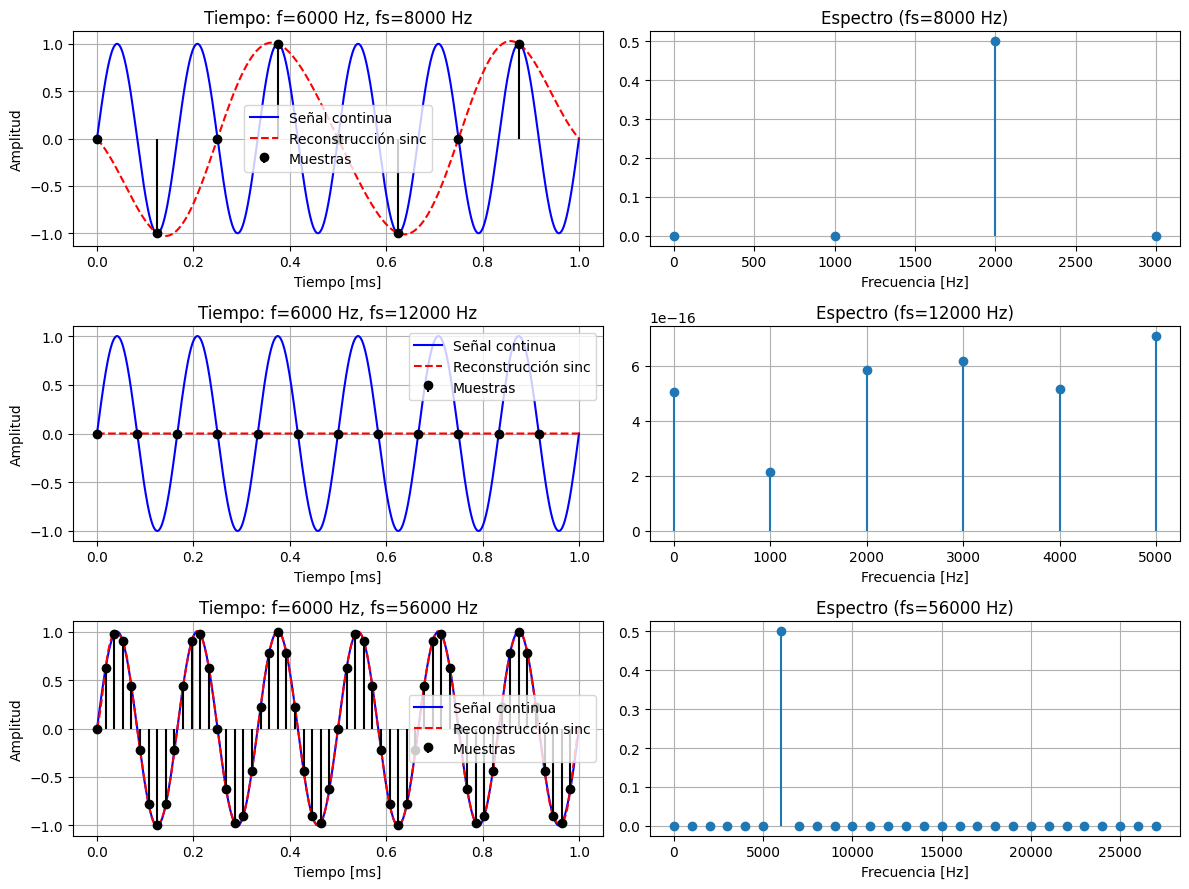

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def generate_continuous(f, phi, fs_cont, duration):
    t = np.arange(0, duration, 1/fs_cont)
    x = np.sin(2*np.pi*f*t + phi)
    return t, x

def sample_signal(f, phi, fs_sample, duration):
    t = np.arange(0, duration, 1/fs_sample)
    x = np.sin(2*np.pi*f*t + phi)
    return t, x

def sinc_reconstruction(t_s, x_s, fs, t_dense):
    T = 1/fs
    # Matriz: para cada punto de t_dense calculamos los sinc respecto a las muestras
    sinc_matrix = np.sinc((t_dense[:,None] - t_s[None,:]) / T)
    return sinc_matrix @ x_s

def plot_spectrum(x, fs, ax, title="Espectro"):
    N = len(x)
    X = fft(x)
    freqs = fftfreq(N, 1/fs)
    idx = freqs >= 0
    ax.stem(freqs[idx], np.abs(X[idx])/N, basefmt=" ")
    ax.set_title(title)
    ax.set_xlabel("Frecuencia [Hz]")
    ax.grid(True)

# -----------------------------
# Experimento
# -----------------------------
f = 6000
phi = 0.0
duration = 0.001
fs_cont = 1_000_000

# señal continua
t_cont, x_cont = generate_continuous(f, phi, fs_cont, duration)

# tasas de muestreo
fs_values = [8000, 12000, 56000]

fig, axes = plt.subplots(len(fs_values), 2, figsize=(12, 3*len(fs_values)))

for i, fs in enumerate(fs_values):
    # muestras
    t_s, x_s = sample_signal(f, phi, fs, duration)

    # tiempo denso para reconstrucción
    t_dense = np.linspace(0, duration, 2000)
    x_rec = sinc_reconstruction(t_s, x_s, fs, t_dense)

    # --- dominio del tiempo ---
    axes[i,0].plot(t_cont*1000, x_cont, 'b-', label="Señal continua")
    axes[i,0].plot(t_dense*1000, x_rec, 'r--', label="Reconstrucción sinc")
    axes[i,0].stem(t_s*1000, x_s, linefmt='k-', markerfmt='ko', basefmt=" ", label="Muestras")
    axes[i,0].set_title(f"Tiempo: f={f} Hz, fs={fs} Hz")
    axes[i,0].set_xlabel("Tiempo [ms]")
    axes[i,0].set_ylabel("Amplitud")
    axes[i,0].grid(True)
    axes[i,0].legend()

    # --- espectro ---
    plot_spectrum(x_s, fs, axes[i,1], title=f"Espectro (fs={fs} Hz)")

plt.tight_layout()
plt.show()

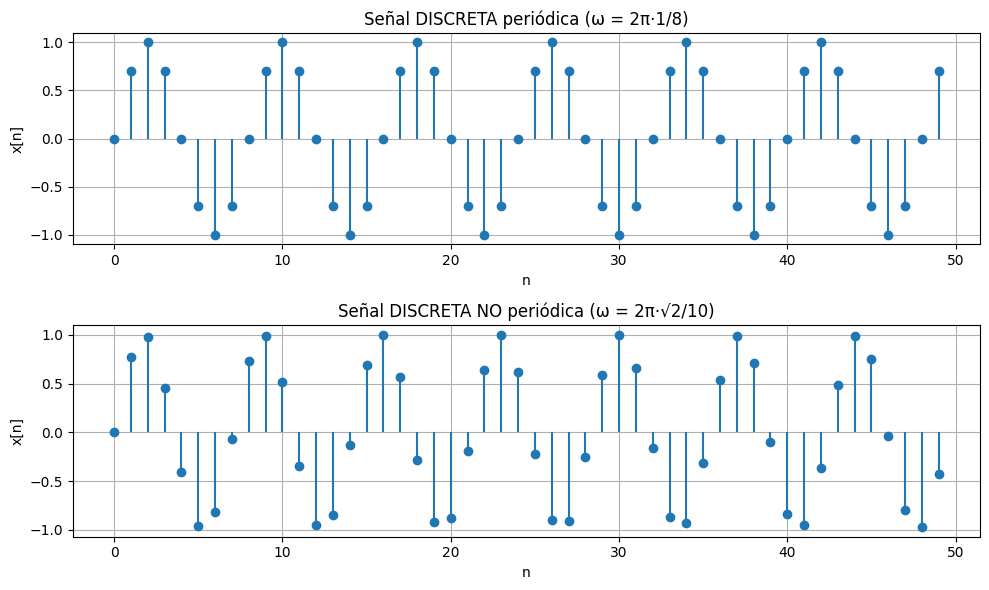

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Señales discretas
# -----------------------------
N = 200  # número total de muestras
n = np.arange(N)

# Caso 1: frecuencia racional -> señal periódica
omega1 = 2 * np.pi * (1/8)   # múltiplo racional de 2π
x1 = np.sin(omega1 * n)

# Caso 2: frecuencia irracional -> señal NO periódica
omega2 = 2 * np.pi * np.sqrt(2)/10   # frecuencia irracional
x2 = np.sin(omega2 * n)

# -----------------------------
# Graficar
# -----------------------------
fig, axs = plt.subplots(2, 1, figsize=(10,6))

xlim_max = N // 4  # mostrar solo 1/4 del eje x

axs[0].stem(n[:xlim_max], x1[:xlim_max], basefmt=" ")
axs[0].set_title("Señal DISCRETA periódica (ω = 2π·1/8)")
axs[0].set_xlabel("n")
axs[0].set_ylabel("x[n]")
axs[0].grid(True)

axs[1].stem(n[:xlim_max], x2[:xlim_max], basefmt=" ")
axs[1].set_title("Señal DISCRETA NO periódica (ω = 2π·√2/10)")
axs[1].set_xlabel("n")
axs[1].set_ylabel("x[n]")
axs[1].grid(True)

plt.tight_layout()
plt.show()

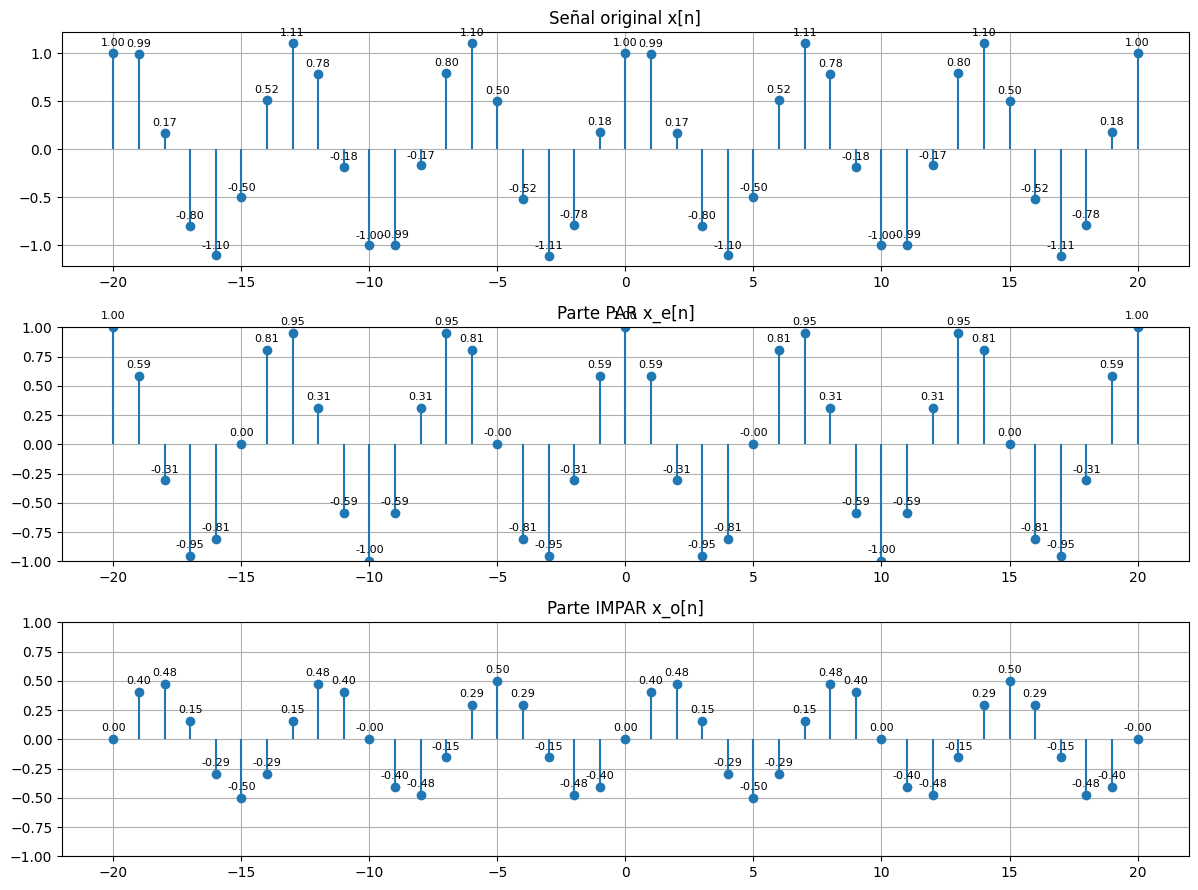

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de muestras
n = np.arange(-20, 21)

# Señal original: combinación de coseno (par) y seno (impar)
x = np.cos(0.3*np.pi*n) + 0.5*np.sin(0.3*np.pi*n)

# Crear diccionario para x[-n]
x_dict = dict(zip(n, x))
x_neg = np.array([x_dict[-ni] for ni in n])

# Descomposición
x_even = 0.5 * (x + x_neg)
x_odd  = 0.5 * (x - x_neg)

# Función auxiliar para mostrar valores encima de los puntos
def stem_with_values(ax, n, y, title, ylim=None):
    markerline, stemlines, baseline = ax.stem(n, y, basefmt=" ")
    ax.set_title(title)
    ax.grid(True)
    if ylim:
        ax.set_ylim(ylim)
    # Añadir valor encima de cada punto
    for xi, yi in zip(n, y):
        ax.text(xi, yi + 0.05, f"{yi:.2f}", ha='center', va='bottom', fontsize=8)

# Graficar
fig, axs = plt.subplots(3, 1, figsize=(12, 9))

stem_with_values(axs[0], n, x, "Señal original x[n]")
stem_with_values(axs[1], n, x_even, "Parte PAR x_e[n]", ylim=[-1, 1])
stem_with_values(axs[2], n, x_odd, "Parte IMPAR x_o[n]", ylim=[-1, 1])

plt.tight_layout()
plt.show()

🎤 Grabando tu voz...
Energía total de la grabación: 10.405456


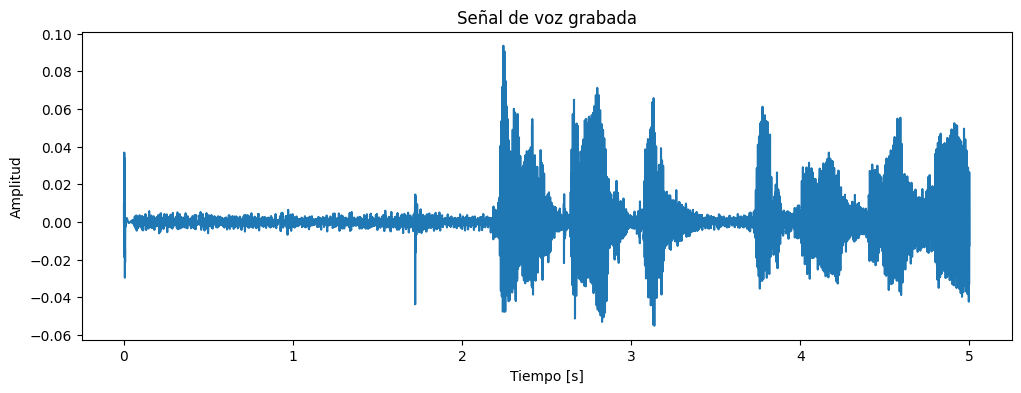

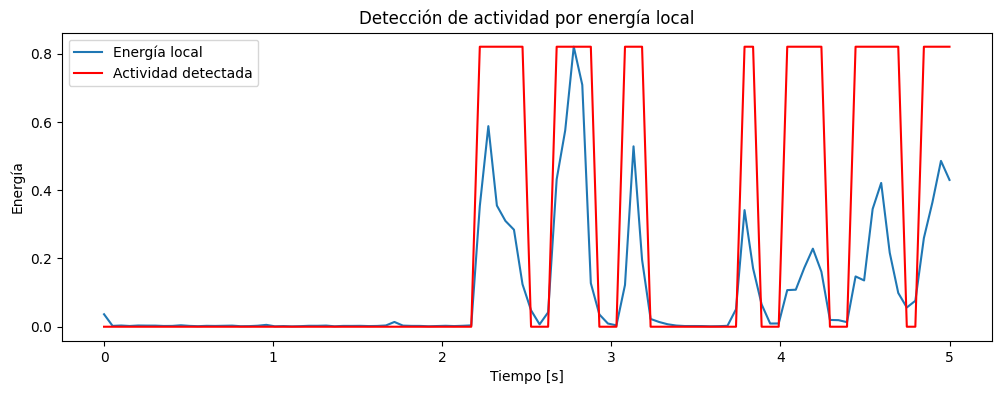

Reproduciendo segmentos activos (1.55 s)


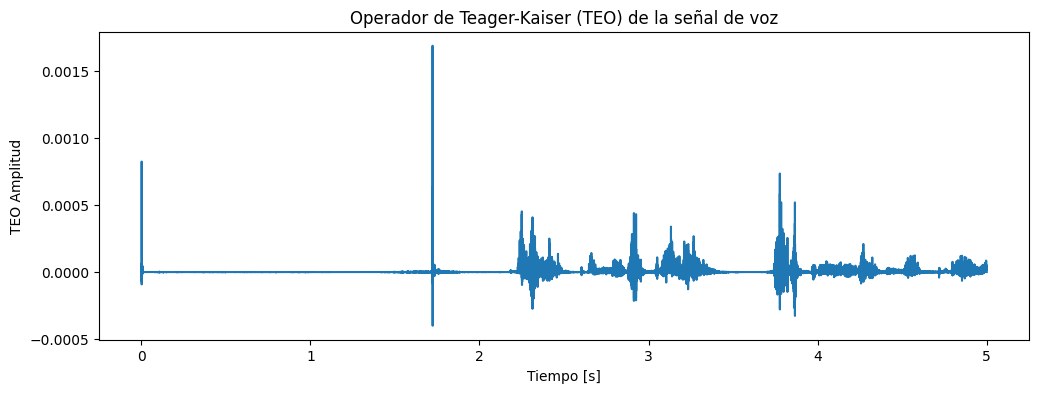

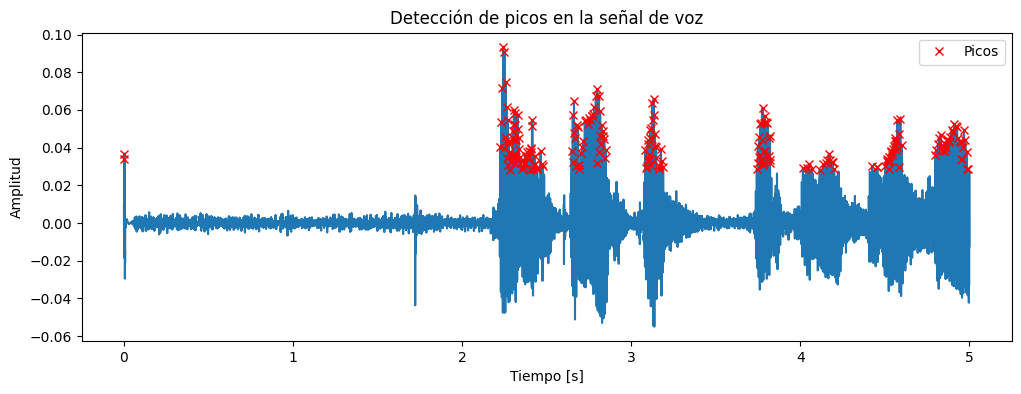

Energía aproximada de x(t)=exp(-t): 0.5000166989078999


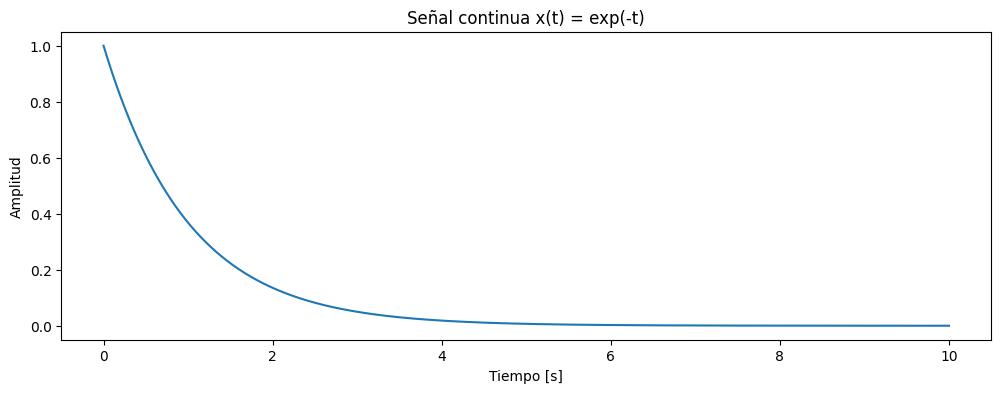

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import soundfile as sf
from scipy.signal import find_peaks
from IPython.display import Audio

# -----------------------------
# 1. Funciones de energía
# -----------------------------
def energia_discreta(x):
    """Energía total de una señal discreta"""
    return np.sum(np.abs(x)**2)

def energia_continua(x, t):
    """Energía de señal continua (aprox. numérica)"""
    return np.trapezoid(np.abs(x)**2, t)

def energia_local_ventana(x, ventana):
    """Energía local por ventana"""
    return [energia_discreta(x[i:i+ventana]) for i in range(0, len(x), ventana)]

def teo(x):
    """Operador de Teager-Kaiser discreto"""
    y = np.zeros_like(x)
    y[1:-1] = x[1:-1]**2 - x[:-2] * x[2:]
    return y

# -----------------------------
# 2. Grabación de voz
# -----------------------------
fs = 16000
dur = 5  # segundos
print("🎤 Grabando tu voz...")
voz = sd.rec(int(dur*fs), samplerate=fs, channels=1)
sd.wait()
voz = voz.flatten()
sf.write("voz_prueba.wav", voz, fs)

# -----------------------------
# 3. Energía total
# -----------------------------
E_voz = energia_discreta(voz)
print("Energía total de la grabación:", E_voz)

# -----------------------------
# 4. Visualización de la señal
# -----------------------------
plt.figure(figsize=(12,4))
plt.plot(np.linspace(0, dur, len(voz)), voz)
plt.title("Señal de voz grabada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.show()

# -----------------------------
# 5. Energía local por ventana y detección de actividad
# -----------------------------
ventana = int(0.05 * fs)  # 50 ms
energia_local = energia_local_ventana(voz, ventana)
tiempo_ventana = np.linspace(0, dur, len(energia_local))

# Umbral para detectar actividad
umbral = max(energia_local) * 0.1
actividad = [1 if e > umbral else 0 for e in energia_local]

# Gráfica
plt.figure(figsize=(12,4))
plt.plot(tiempo_ventana, energia_local, label="Energía local")
plt.plot(tiempo_ventana, np.array(actividad)*max(energia_local), 'r', label="Actividad detectada")
plt.title("Detección de actividad por energía local")
plt.xlabel("Tiempo [s]")
plt.ylabel("Energía")
plt.legend()
plt.show()

# -----------------------------
# 6. Reproducir segmentos activos
# -----------------------------
segmentos_activos = []
for i, flag in enumerate(actividad):
    if flag == 1:
        start = i * ventana
        end = start + ventana
        segmentos_activos.append(voz[start:end])

if segmentos_activos:
    voz_activa = np.concatenate(segmentos_activos)
    print(f"Reproduciendo segmentos activos ({len(voz_activa)/fs:.2f} s)")
    Audio(voz_activa, rate=fs)  # En Jupyter
else:
    print("No se detectó actividad de voz en la grabación")

# -----------------------------
# 7. Operador de Teager-Kaiser
# -----------------------------
teo_voz = teo(voz)
plt.figure(figsize=(12,4))
plt.plot(np.linspace(0, dur, len(voz)), teo_voz)
plt.title("Operador de Teager-Kaiser (TEO) de la señal de voz")
plt.xlabel("Tiempo [s]")
plt.ylabel("TEO Amplitud")
plt.show()

# -----------------------------
# 8. Detección de picos
# -----------------------------
picos, _ = find_peaks(voz, height=0.3*np.max(voz))
tiempo_picos = picos/fs

plt.figure(figsize=(12,4))
plt.plot(np.linspace(0, dur, len(voz)), voz)
plt.plot(tiempo_picos, voz[picos], "rx", label="Picos")
plt.title("Detección de picos en la señal de voz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

# -----------------------------
# 9. Ejemplo de señal continua
# -----------------------------
t = np.linspace(0, 10, 1000)
x_cont = np.exp(-t)
E_cont = energia_continua(x_cont, t)
print("Energía aproximada de x(t)=exp(-t):", E_cont)

plt.figure(figsize=(12,4))
plt.plot(t, x_cont)
plt.title("Señal continua x(t) = exp(-t)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.show()

In [28]:
from IPython.display import Audio, display

# -----------------------------
# Agrupar ventanas consecutivas de actividad en segmentos continuos
# -----------------------------
segmentos_activos = []
i = 0
while i < len(actividad):
    if actividad[i] == 1:
        # inicio del segmento
        start = i * ventana
        # buscamos hasta que la actividad vuelva a 0
        j = i
        while j < len(actividad) and actividad[j] == 1:
            j += 1
        end = min(j * ventana, len(voz))
        segmentos_activos.append(voz[start:end])
        i = j  # saltamos a la siguiente ventana no activa
    else:
        i += 1

# -----------------------------
# Reproducir cada segmento activo
# -----------------------------
print(f"Se encontraron {len(segmentos_activos)} segmentos activos.")
for idx, segmento in enumerate(segmentos_activos):
    print(f"Segmento activo {idx+1} (duración {len(segmento)/fs:.2f} s)")
    display(Audio(segmento, rate=fs))

Se encontraron 7 segmentos activos.
Segmento activo 1 (duración 0.30 s)


Segmento activo 2 (duración 0.25 s)


Segmento activo 3 (duración 0.15 s)


Segmento activo 4 (duración 0.10 s)


Segmento activo 5 (duración 0.25 s)


Segmento activo 6 (duración 0.30 s)


Segmento activo 7 (duración 0.20 s)
